<a href="https://colab.research.google.com/github/KamilShape/whey_analysis/blob/main/Whey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Main goal of this project is to create model that predict price of whey protein diet supplement and create alghoritm that find product with similiar ingredients and lower price. There are data gathered from 5 main companies in Poland.

## **TABLE CONTENT:**
1. Introduction
2. Dataset analysis
3. Data visualisation
4. Preparing data to model

#**1. Introduction**


In [1]:
#Libraries import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **2.Dataset analysis**

In [2]:
#dataset load
whey = pd.read_csv('/content/whey3.csv', encoding='latin1')

In [3]:
#dataset information
whey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             369 non-null    int64  
 1   Name           369 non-null    object 
 2   Company        369 non-null    object 
 3   Brand          369 non-null    object 
 4   Package        369 non-null    float64
 5   Package_type   369 non-null    object 
 6   Calories       369 non-null    float64
 7   Fat            369 non-null    float64
 8   Saturated_fat  369 non-null    float64
 9   Carbs          369 non-null    float64
 10  Sugar          369 non-null    float64
 11  Protein        369 non-null    float64
 12  WPC            369 non-null    float64
 13  WPI            369 non-null    float64
 14  Soy            369 non-null    float64
 15  Yeast          369 non-null    float64
 16  Pea            369 non-null    float64
 17  Casein         369 non-null    float64
 18  Cannabis  

In [4]:
#dataset
whey

,id,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,...,Protein,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price
0,1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.000,6.00000,4.200000,6.90000,...,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99
1,2,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.000,6.00000,4.200000,6.90000,...,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99
2,3,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.000,6.00000,4.200000,6.90000,...,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,69.99
3,4,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.000,6.00000,4.200000,6.90000,...,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,154.99
4,5,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.000,6.00000,4.200000,6.90000,...,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,199.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,365,OstroVit Whey Protein Isolate 700 g,KFD,Ostrovit,700.0,box,359.000,1.00000,0.600000,1.20000,...,86.0000,86.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,77.99
365,366,SCITEC CASEIN COMPLEX 920g,KFD,Scitec Nutrition,920.0,box,386.667,5.33333,5.333330,8.33333,...,76.6667,0.0,0.0,0.0,0.0,0.0,76.67,0.0,0.0,112.99
366,367,HI TEC PROTEIN 80 - 1000G,KFD,HI TEC,1000.0,bag,374.000,3.90000,3.900000,6.80000,...,80.3000,0.0,0.0,80.3,0.0,0.0,0.00,0.0,0.0,78.99
367,368,OSTROVIT WPC 80 EU ECONOMY 700g,KFD,Ostrovit,700.0,bag,380.000,2.00000,0.066667,20.20000,...,70.5000,70.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,68.90


In [5]:
#removing id column
whey = whey.drop('id', axis=1)

In [6]:
#price per 100g
whey['Price/100'] = whey['Price']/whey['Package']*100

In [7]:
#avg price
whey['Price'].mean()

139.87135501355016

In [8]:
#avg price per 100g
whey['Price/100'].mean()

12.64697966748568

## **2.1 Histogram**

(array([ 91., 145.,  40.,  29.,  39.,  12.,   7.,   0.,   0.,   6.]),
 array([  4.99,  67.49, 129.99, 192.49, 254.99, 317.49, 379.99, 442.49,
        504.99, 567.49, 629.99]),
 <BarContainer object of 10 artists>)

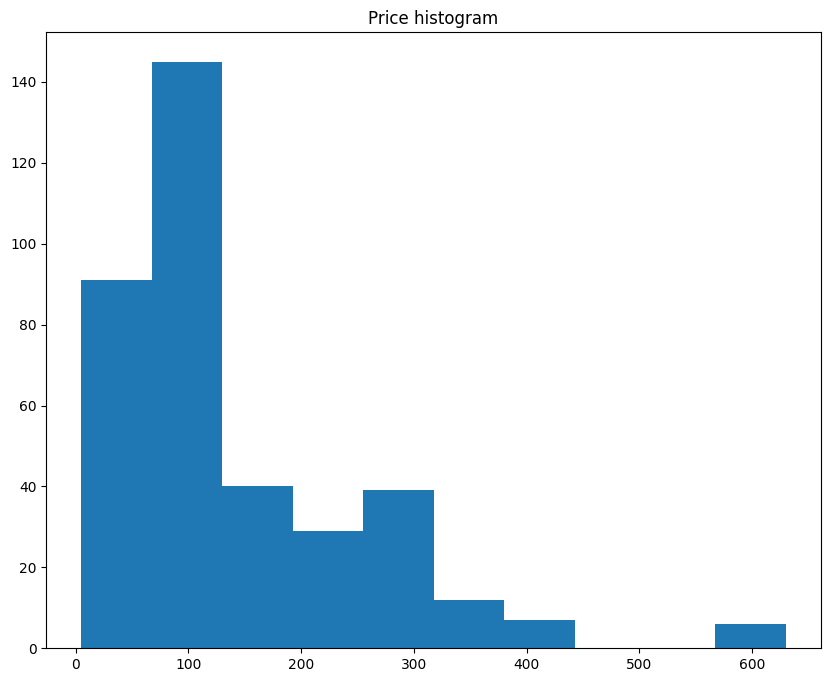

In [9]:
#histogram
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title('Price histogram')
ax.hist(whey['Price'])

In [10]:
#shapiro - wilk test
shapiro_test = stats.shapiro(whey['Price'])
shapiro_test.pvalue
#p<0,05 - no bell curve

1.3135939612541494e-19

## **2.2 Removing outliers**

In [11]:
whey['Price'].quantile(0.90)

285.1979999999999

In [12]:
whey['Price'].quantile(0.1)

44.998

In [13]:
whey = whey[(whey['Price'] > whey['Price'].quantile(0.10)) & (whey['Price'] < whey['Price'].quantile(0.90))]

In [14]:
#dataset length after outliers removing
len(whey )

295

#**3.Data Visualisation**

In [15]:
#bar chart function
def bar_chart(ax, x, y, color, title, ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

#add text function
def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

In [16]:
types = ['WPC',	'WPI',	'Soy',	'Yeast',	'Pea',	'Casein',	'Cannabis',	'Beef']

In [17]:
wpc_price = whey[whey['WPC'] > 0 ]['Price'].mean()
wpi_price = whey[whey['WPI'] > 0 ]['Price'].mean()
soy_price = whey[whey['Soy'] > 0 ]['Price'].mean()
yeast_price = whey[whey['Yeast'] > 0 ]['Price'].mean()
pea_price = whey[whey['Pea'] > 0 ]['Price'].mean()
casein_price = whey[whey['Casein'] > 0 ]['Price'].mean()
cannabis_price = whey[whey['Cannabis'] > 0 ]['Price'].mean()
beef_price = whey[whey['Beef'] > 0 ]['Price'].median()
type_prices = [wpc_price, wpi_price, soy_price, yeast_price, pea_price, casein_price,cannabis_price, beef_price]

In [18]:
wpc_price_100 = whey[whey['WPC'] > 0 ]['Price/100'].mean()
wpi_price_100 = whey[whey['WPI'] > 0 ]['Price/100'].mean()
soy_price_100 = whey[whey['Soy'] > 0 ]['Price/100'].mean()
yeast_price_100 = whey[whey['Yeast'] > 0 ]['Price/100'].mean()
pea_price_100 = whey[whey['Pea'] > 0 ]['Price/100'].mean()
casein_price_100 = whey[whey['Casein'] > 0 ]['Price/100'].mean()
cannabis_price_100 = whey[whey['Cannabis'] > 0 ]['Price/100'].mean()
beef_price_100 = whey[whey['Beef'] > 0 ]['Price/100'].median()
type_prices_100 = [wpc_price_100, wpi_price_100, soy_price_100, yeast_price_100, pea_price_100, casein_price_100, cannabis_price_100, beef_price_100]

In [19]:
types_df = pd.DataFrame()

In [20]:
types_df['Type'] = types
types_df['Price'] = type_prices
types_df['Price/100'] = type_prices_100

In [21]:
types_df

,Type,Price,Price/100
0,WPC,126.754681,11.572501
1,WPI,132.361765,13.538921
2,Soy,121.891000,8.901930
3,Yeast,141.792000,10.418172
4,Pea,99.825000,14.990084
5,Casein,127.961111,12.524291
6,Cannabis,56.000000,8.000000
7,Beef,126.000000,18.000000


In [22]:
#packages categories
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'])

In [23]:
whey['Package_type'][33] = 'bag'

<ipython-input-23-53b2c8795266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


<ipython-input-24-75a060aed415>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


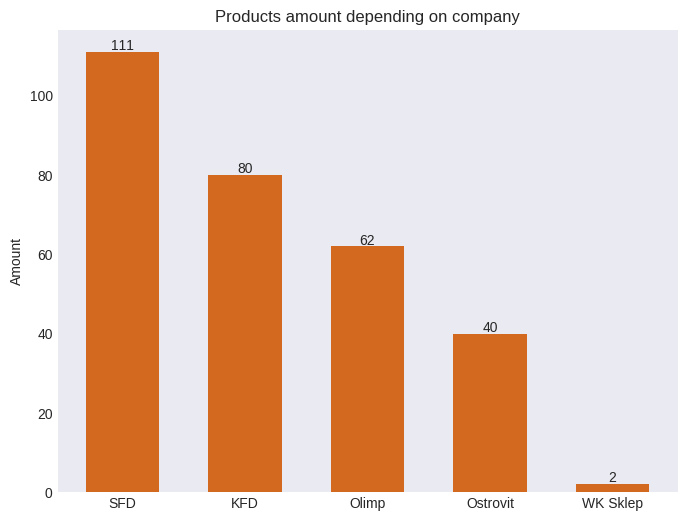

In [24]:
#products amount depending on company in dataset
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (8,6))
bar_chart(ax, whey['Company'].value_counts().index,  whey['Company'].value_counts().values, 'chocolate', 'Products amount depending on company', 'Amount')
add_text(ax, whey['Company'].value_counts().index,  whey['Company'].value_counts().values, -0.5, 0)

In [25]:
#packages categories
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'] )

In [26]:
whey['Package_type'][33] = 'bag'

<ipython-input-26-53b2c8795266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


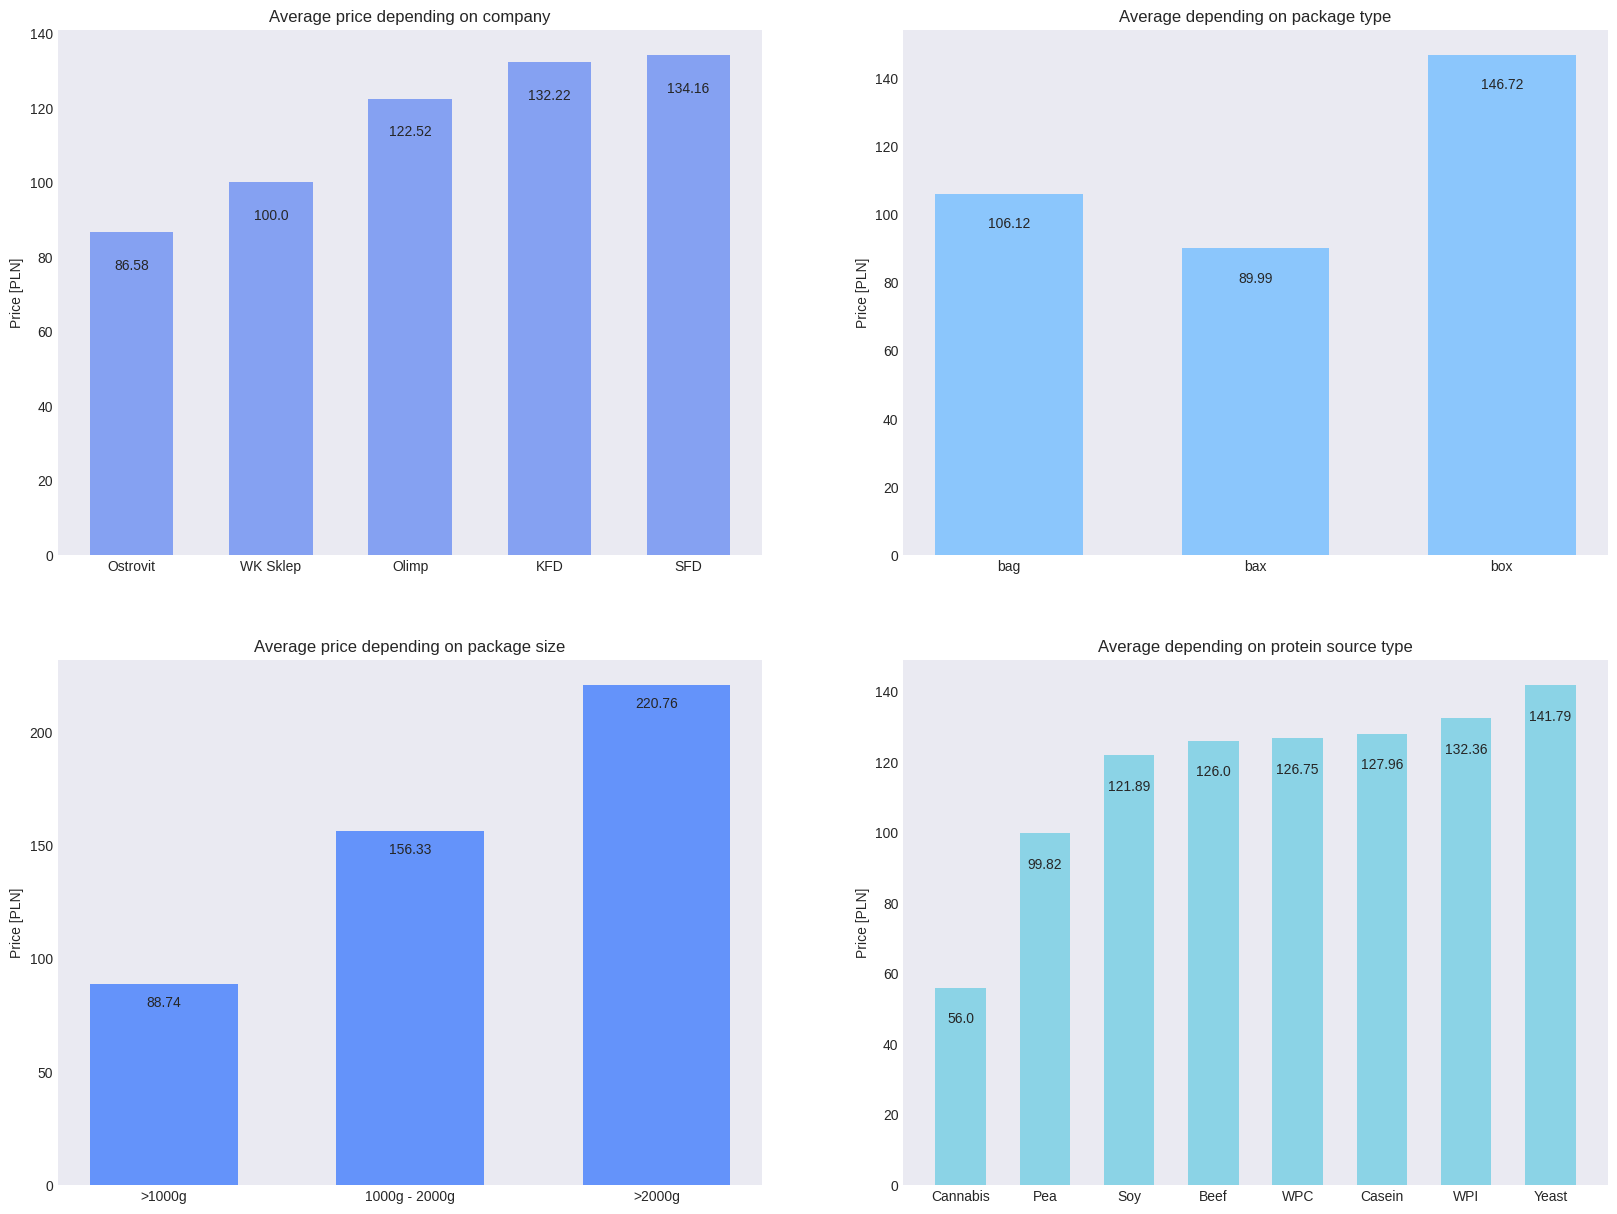

In [27]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bar_chart(ax[0,0], whey.groupby('Company')['Price'].mean().sort_values().index, whey.groupby('Company')['Price'].mean().sort_values().values, '#85A1F2', 'Average price depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, '#8BC6FC', 'Average depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, '#6493FA', 'Average price depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types_df.sort_values(by='Price')['Type'],types_df.sort_values(by='Price')['Price'],'#8BD3E6', 'Average depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price'].mean().index, whey.groupby('Company')['Price'].mean().values, 10, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price'].mean().index, whey.groupby('Package_type')['Price'].mean().values, 10, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price'].mean().index, whey.groupby('Package_category')['Price'].mean().values, 10, 0)
add_text(ax[1,1],  types_df.sort_values(by='Price')['Type'],types_df.sort_values(by='Price')['Price'], 10, 0)

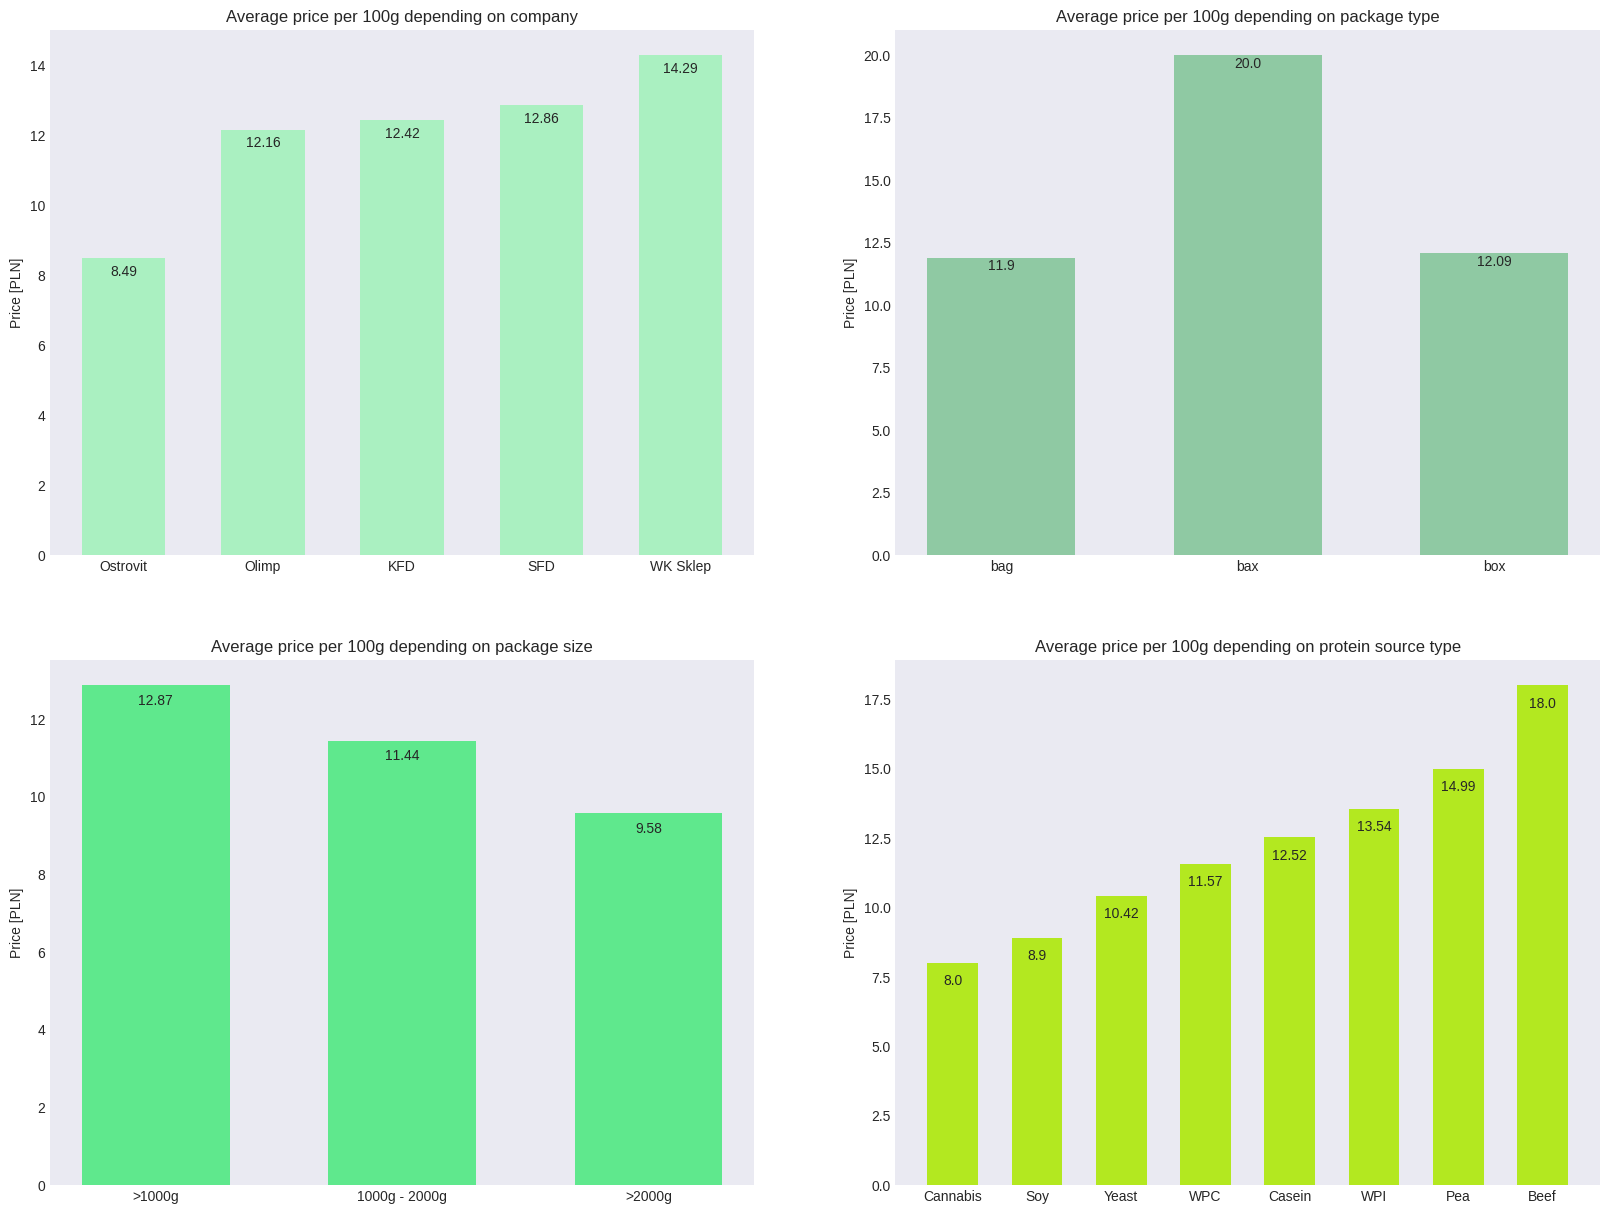

In [28]:
fig, ax = plt.subplots(2,2, figsize = (20,15))

bar_chart(ax[0,0], whey.groupby('Company')['Price/100'].mean().sort_values().index, whey.groupby('Company')['Price/100'].mean().sort_values().values, '#AAF0C1', 'Average price per 100g depending on company', 'Price [PLN]')
bar_chart(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, '#8FC9A3', 'Average price per 100g depending on package type', 'Price [PLN]')
bar_chart(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, '#5FE88D', 'Average price per 100g depending on package size', 'Price [PLN]')
bar_chart(ax[1,1], types_df.sort_values(by='Price/100')['Type'],types_df.sort_values(by='Price/100')['Price/100'], '#B3E820', 'Average price per 100g depending on protein source type', 'Price [PLN]')

add_text(ax[0,0], whey.groupby('Company')['Price/100'].mean().index, whey.groupby('Company')['Price/100'].mean().values, 0.5, 0)
add_text(ax[0,1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,0], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, 0.5, 0)
add_text(ax[1,1], types_df.sort_values(by='Price/100')['Type'],types_df.sort_values(by='Price/100')['Price/100'], 0.8, 0)

# **4. Preparing data to model**

In [29]:
#choosing columns
cat_columns = ['Company',	'Brand', 'Package_type']

In [30]:
#changing columns to cat
for cat in cat_columns:
  whey[cat] = whey[cat].astype('category')
  whey[cat] = whey[cat].cat.codes

In [31]:
whey

,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,...,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100,Package_category
0,WPC PROTEIN PLUS 700g,3,22,700.0,0,394.000,6.00000,4.200000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143,>1000g
1,WPC PROTEIN PLUS 700g,3,22,700.0,0,394.000,6.00000,4.200000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143,>1000g
2,WPC PROTEIN PLUS 900g,3,22,900.0,0,394.000,6.00000,4.200000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,69.99,7.776667,>1000g
3,WPC PROTEIN PLUS 2250g,3,22,2250.0,0,394.000,6.00000,4.200000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,154.99,6.888444,>2000g
4,WPC PROTEIN PLUS 3000g,3,22,3000.0,2,394.000,6.00000,4.200000,6.90000,4.40000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,199.99,6.666333,>2000g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,OstroVit Whey Protein Isolate 700 g,0,17,700.0,2,359.000,1.00000,0.600000,1.20000,1.20000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,77.99,11.141429,>1000g
365,SCITEC CASEIN COMPLEX 920g,0,23,920.0,2,386.667,5.33333,5.333330,8.33333,3.33333,...,0.0,0.0,0.0,0.0,76.67,0.0,0.0,112.99,12.281522,>1000g
366,HI TEC PROTEIN 80 - 1000G,0,10,1000.0,0,374.000,3.90000,3.900000,6.80000,6.80000,...,0.0,80.3,0.0,0.0,0.00,0.0,0.0,78.99,7.899000,1000g - 2000g
367,OSTROVIT WPC 80 EU ECONOMY 700g,0,17,700.0,0,380.000,2.00000,0.066667,20.20000,6.26667,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,68.90,9.842857,>1000g


In [33]:
#choosing columns for models
data_columns = whey[['Company', 'Brand', 'Package', 'Package_type', 'Calories',
       'Fat', 'Saturated_fat', 'Carbs', 'Sugar', 'Protein', 'WPC', 'WPI',
       'Soy', 'Yeast', 'Pea', 'Casein', 'Cannabis', 'Beef', 'Price', 'Price/100']]

In [35]:
data_columns

,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,Sugar,Protein,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100
0,3,22,700.0,0,394.000,6.00000,4.200000,6.90000,4.40000,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143
1,3,22,700.0,0,394.000,6.00000,4.200000,6.90000,4.40000,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,58.99,8.427143
2,3,22,900.0,0,394.000,6.00000,4.200000,6.90000,4.40000,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,69.99,7.776667
3,3,22,2250.0,0,394.000,6.00000,4.200000,6.90000,4.40000,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,154.99,6.888444
4,3,22,3000.0,2,394.000,6.00000,4.200000,6.90000,4.40000,78.0000,97.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,199.99,6.666333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0,17,700.0,2,359.000,1.00000,0.600000,1.20000,1.20000,86.0000,86.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,77.99,11.141429
365,0,23,920.0,2,386.667,5.33333,5.333330,8.33333,3.33333,76.6667,0.0,0.0,0.0,0.0,0.0,76.67,0.0,0.0,112.99,12.281522
366,0,10,1000.0,0,374.000,3.90000,3.900000,6.80000,6.80000,80.3000,0.0,0.0,80.3,0.0,0.0,0.00,0.0,0.0,78.99,7.899000
367,0,17,700.0,0,380.000,2.00000,0.066667,20.20000,6.26667,70.5000,70.5,0.0,0.0,0.0,0.0,0.00,0.0,0.0,68.90,9.842857


# **5. Linear regression model**

In [36]:
#depending and independing values
y = data_columns.pop('Price/100')
X = data_columns.iloc[:,1:]

In [39]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
#train data prediction
model = LinearRegression()
model.fit(X_train, y_train)
y_lin_train = model.predict(X_train)

In [41]:
#train model params
model.coef_

array([-0.01006913, -0.008485  , -0.17438058,  0.00406504, -0.13882816,
        0.08438849, -0.00087464, -0.01127486, -0.01357576,  0.01292659,
        0.014311  , -0.00306414, -0.00942184,  0.03969551,  0.01018497,
       -0.00265418,  0.02685952,  0.07914517])

In [44]:
#model intercept
model.intercept_

10.867681987589389